#                                                                   Capstone Project - Fraud Detection

<img src="fraud.webp" alt="Fraud Image" width="1600">

### Problem Statement

In this project, we aim to address the growing challenge of fraud in mobile financial transactions by leveraging machine learning techniques. Our goal is to develop a robust and accurate fraud detection model that can identify fraudulent transactions in real time. By doing so, we seek to enhance transaction security, minimize financial losses, and provide valuable insights into the key factors that contribute to fraudulent activities.

### Objectives

To perform comprehensive data exploration and visualization to understand transaction patterns and identify key fraud indicators.

To apply effective feature engineering and encoding techniques to enhance model performance.

To evaluate multiple machine learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting) and select the most accurate and reliable classifier.

To assess model performance using metrics such as precision, recall, F1-score, and ROC-AUC.

To analyze the financial impact of the model by estimating potential revenue, losses, and profits.

To create clear and impactful visualizations for communicating insights and model outcomes.

## Step 1

### 1.1 Import libraries : Load required libraries for data handling, visualization, preprocessing, and machine learning models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pickle


#Imports common data libraries: pandas (table manipulation), numpy (numerical ops).
#matplotlib and seaborn for visualization.
#Scikit-learn tools for preprocessing : StandardScaler, LabelEncoder


## Step 2

### 2.1 Load dataset

In [2]:
# Reads the CSV into a pandas DataFrame df and shows the first 10 rows 
# Inspected the top few rows with head()

df = pd.read_csv(r"C:\Users\MADHIVANAN\Downloads\OneDrive_1_27-09-2025\Fraud_Analysis_Dataset.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1
5,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1
6,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1
7,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1
8,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1
9,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1


## Step 3

### Exploratory Data Analysis (EDA)                                    

Inspect Dataset : These lightweight checks are essential to detect missing data, wrong types, and duplicates which can bias training

3.1 It returns (rows, columns), column dtypes and non-null counts                                                                                               

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


3.2 Counts missing values per column

In [4]:

df.isnull().sum() #there is no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

3.3 Dataset Description : Gives summary statistics for numeric columns

In [5]:
# Describe numericals columns

df.describe() 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


3.4 Counts duplicated rows

In [6]:
# checking if there are duplicate rows in your dataset

df.duplicated().sum() #there is no duplicates

np.int64(0)

3.5 Check class imbalance

In [7]:
# counts of isFraud values (0 vs 1)

print(f'Is Fraud column : {df['isFraud'].value_counts()}')

Is Fraud column : isFraud
0    10000
1     1142
Name: count, dtype: int64


3.6 Categorical distribution check - Univariate Analysis

In [8]:
# it counts how many times each unique value appears in the type column

print(f'type column : {df['type'].value_counts()}')

type column : type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64


## Step 4

## visualization

4.1 Transaction amount distribution

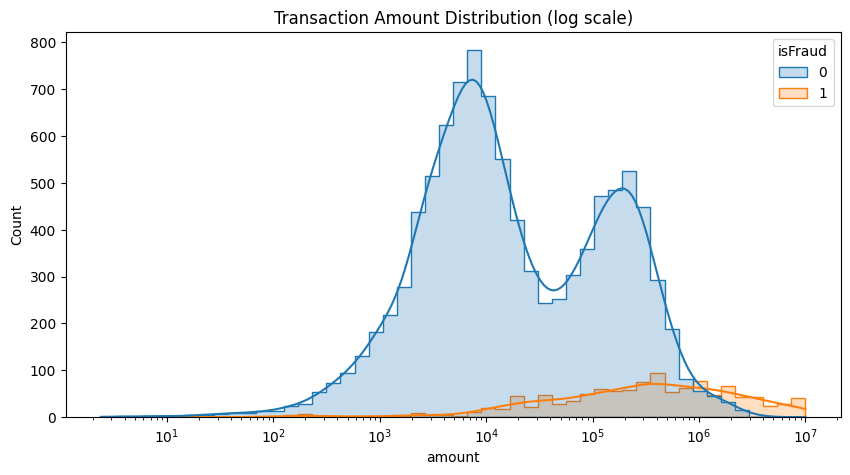

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="amount", bins=50, log_scale=True, hue="isFraud", kde=True, element="step")
plt.title("Transaction Amount Distribution (log scale)")
plt.show() 
# bimodal

4.2 Fraud Count by Transaction Type

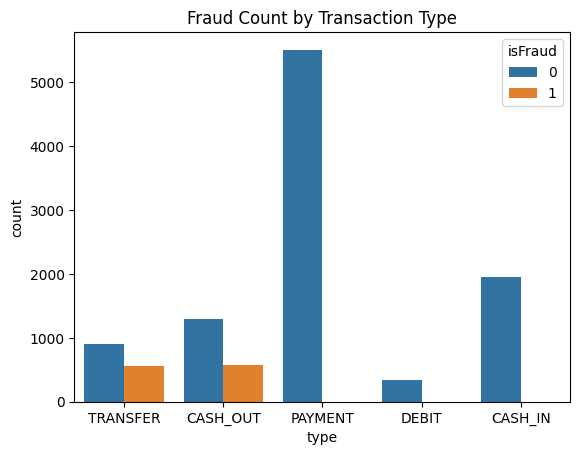

In [10]:
sns.countplot(x="type", hue="isFraud", data=df)
plt.title("Fraud Count by Transaction Type")
plt.show()

4.3 Bar chart for fraud vs non-fraud

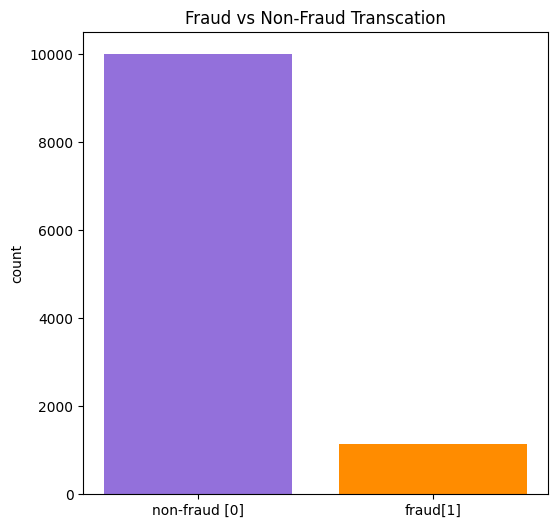

In [11]:
# Gives a quick illustration of class imbalance

labels = ['non-fraud [0]','fraud[1]']
fraud_count = [10000,1142]
plt.figure(figsize=(6,6))
plt.bar(labels,fraud_count,color = ["mediumpurple", "darkorange"])
plt.ylabel("count")
plt.title("Fraud vs Non-Fraud Transcation")
plt.show()

4.4 correlation between features

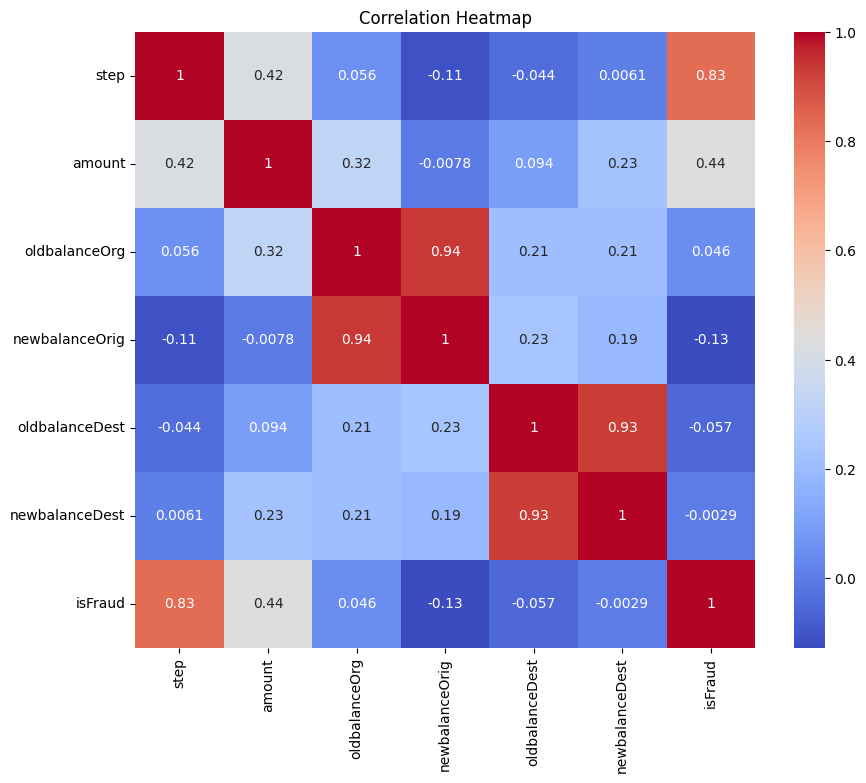

In [12]:
df_corr = df[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest','isFraud']]

plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(numeric_only= True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## step 5

### Feature Engineering 

5.1 Create features to improve model performance

In [13]:
# Creates two new features measuring inconsistencies in balances after a transaction
# errorBalanceOrig: If > 0, it means oldbalanceOrg - amount != newbalanceOrig (net mismatch). Large positive/negative values may indicate tampering. 
# errorBalanceDest: Similar for destination

df["errorBalanceOrig"] = df["oldbalanceOrg"] - df["amount"] - df["newbalanceOrig"]
df["errorBalanceDest"] = df["oldbalanceDest"] + df["amount"] - df["newbalanceDest"]

In [14]:
# Examples :
# oldbalanceOrg = 1000
# amount = 200
# newbalanceOrig = 800  # 1000 - 200
# df["errorBalanceOrig"] = df["oldbalanceOrg"] - df["amount"] - df["newbalanceOrig"]

# errorBalanceOrig = 1000 - 200 - 800   = 0 

# oldbalanceDest = 500
# amount = 200
# newbalanceDest = 700  # 500 + 200
# df["errorBalanceDest"] = df["oldbalanceDest"] + df["amount"] - df["newbalanceDest"]
# errorBalanceDest = 500 + 200 - 700   = 0 

5.2 Encoding categorical features

In [15]:
# Converts categorical type strings into integer codes (e.g., PAYMENT -> 0, TRANSFER -> 1, ...)
# Many ML algorithms require numeric inputs

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

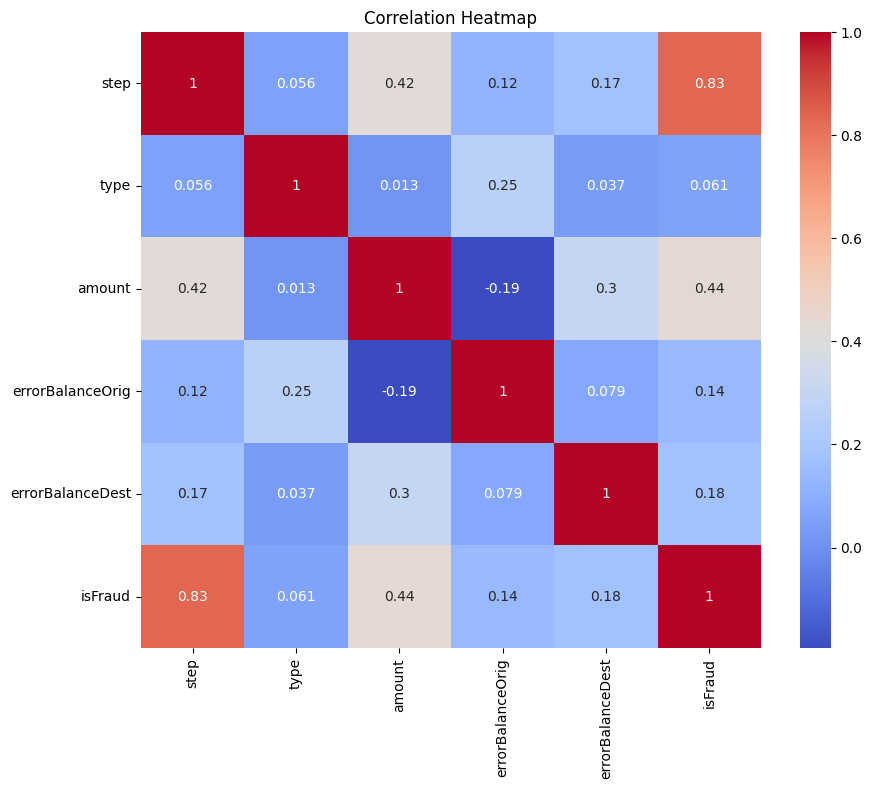

In [16]:
df_corrula = df[['step', 'type', 'amount', 'errorBalanceOrig' , 'errorBalanceDest','isFraud']]

plt.figure(figsize=(10,8))
sns.heatmap(df_corrula.corr(numeric_only= True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

5.3 Feature Selection : Selects the most relevant features for model training

In [17]:
x = df[['step', 'type','amount','errorBalanceOrig', 'errorBalanceDest']]
y = df['isFraud']

## Step 6

### Data Preprocessing for Modeling 

6.1 Splits dataset into training & testing sets : Train-Test Split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

6.2 Scaling numeric features - standardizes features

In [19]:

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

## Step 7

### Model Selection & Training

7.1  Model Initialization and Selection

In [20]:

models = [LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(),SVC(kernel='linear')]

7.2 Cross-Validation with Multiple Models : Evaluates Logistic Regression, Random Forest, Gradient Boosting, KNeighbors Classifier and SVC using 5-fold cross-validation with ROC-AUC score

In [21]:
# for model in models:
#     model.fit(x_train,y_train)
#     y_pred = model.predict(x_test)
#     print(f"-----------------------{model}------------------------")
#     print(f"Classification  :\n {classification_report(y_test,y_pred)}")
#     print(f"precision  :\n {precision_score(y_test,y_pred)}")
#     print(f" Recall  :\n {recall_score(y_test,y_pred)}")
#     print(f"Accuracy  :\n {accuracy_score(y_test,y_pred)}")

In [22]:
# Each model is trained on the training dataset, evaluated using Stratified K-Fold cross-validation to reduce overfitting

k =5
for model in models:
    cv_score =cross_val_score(model,x_train, y_train, cv = 5, scoring='roc_auc', n_jobs=-1)
    print(f"------------------ {model} -------------------")
    print(f"Cross Validation Score (k ={k} : {cv_score})")
    print(f"Standard Deviation: {cv_score.std():.2f}")
    print(f"Mean ROC AUC : {cv_score.mean()}")

------------------ LogisticRegression() -------------------
Cross Validation Score (k =5 : [0.97477881 0.98688183 0.98893443 0.96769574 0.97381868])
Standard Deviation: 0.01
Mean ROC AUC : 0.9784218985200281
------------------ RandomForestClassifier() -------------------
Cross Validation Score (k =5 : [0.99980438 0.99983607 0.99960553 0.99411058 0.99975962])
Standard Deviation: 0.00
Mean ROC AUC : 0.9986232342344582
------------------ GradientBoostingClassifier() -------------------
Cross Validation Score (k =5 : [0.99982326 0.99983777 0.99954577 0.99357315 0.99976477])
Standard Deviation: 0.00
Mean ROC AUC : 0.998508941281726
------------------ KNeighborsClassifier() -------------------
Cross Validation Score (k =5 : [0.98852194 0.99148395 0.99103825 0.98582589 0.98544986])
Standard Deviation: 0.00
Mean ROC AUC : 0.9884639790437809
------------------ SVC(kernel='linear') -------------------
Cross Validation Score (k =5 : [0.97581868 0.98579577 0.98795423 0.96744505 0.97251717])
Standa

## Step 8

### Hyperparameter Tuning (Gradient Boosting) 

8.1 Uses GridSearchCV to find the best hyperparameters for Gradient Boosting

In [23]:
# Tune key parameters for best model

gb_model = GradientBoostingClassifier()
param_grid = { "n_estimators": [50, 100, 200], "max_depth": [2, 3, 5], "max_leaf_nodes": [3, 5, 10], "learning_rate": [0.05,0.01] }

grid_search = GridSearchCV( estimator = gb_model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring ='roc_auc', verbose = 2)

In [24]:
# runs an exhaustive search over the specified hyperparameter grid using the training dat

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.05, 0.01], 'max_depth': [2, 3, ...], 'max_leaf_nodes': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


### Model Evaluation on Test Data : Evaluates the tuned Gradient Boosting model

In [25]:
# Evaluate tuned model on validation set

print("Best Parameters:", grid_search.best_params_)
print("Best ROC_AUC Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_leaf_nodes': 10, 'n_estimators': 100}
Best ROC_AUC Score: 0.9993002422425178


## Step 9

In [26]:
GBC_best_model = grid_search.best_estimator_
y_pred = GBC_best_model.predict(x_test)
y_pred_proba = GBC_best_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Assessed based on Recall, Precision, F1-score, and ROC-AUC for the best-performing models")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc:.4f}")

Assessed based on Recall, Precision, F1-score, and ROC-AUC for the best-performing models

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.93      0.96       230

    accuracy                           0.99      2229
   macro avg       1.00      0.97      0.98      2229
weighted avg       0.99      0.99      0.99      2229

ROC-AUC Score: 0.9996


### Hyperparameters for Random Forest 

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],                   # More trees = better but slower
    'max_depth': [3, 4, 5],                            # Control overfitting
    'min_samples_split': [2, 5, 7],                    # Larger values = more regularization
    'min_samples_leaf': [1, 2, 4],                     # Avoids creating nodes with few samples
    'max_features': ['sqrt', 'log2', None],            # 'sqrt' often best for classification
    'bootstrap': [True, False]                         # Bootstrap sampling or not
}


RFC_model = RandomForestClassifier(random_state=42)

grid_search_RFC = GridSearchCV(
    estimator=RFC_model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross validation
    n_jobs=-1,               # use all CPU cores
    verbose=2,
    scoring='roc_auc'        # AUC is great for fraud detection
)

grid_search_RFC.fit(x_train, y_train)

print("Best parameters:", grid_search_RFC.best_params_)
print("Best ROC-AUC:", grid_search_RFC.best_score_)
 

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [ ]:
RFC_best_model = grid_search_RFC.best_estimator_
y_pred = RFC_best_model.predict(x_test)
y_pred_proba = RFC_best_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Assessed based on Recall, Precision, F1-score, and ROC-AUC for the best-performing models")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc:.4f}")

Assessed based on Recall, Precision, F1-score, and ROC-AUC for the best-performing models

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.93      0.96       230

    accuracy                           0.99      2229
   macro avg       1.00      0.96      0.98      2229
weighted avg       0.99      0.99      0.99      2229

ROC-AUC Score: 0.9995


## Step 10

### Save The Model In The Pickle Format (Dump)

10.1 Saves the best model for future predictions

In [ ]:
# Gradient Boosting

filename = 'Fraud_detection_model.pkl'
with open (filename,'wb') as file:
    pickle.dump(GBC_best_model,file)
    print("model saved successfully")

In [ ]:
# Random Forest

with open ("Fraud_detection_model_RFC.pkl",'wb') as file:
    pickle.dump(RFC_best_model,file)
    print("model saved successfully")

model saved successfully


10.2 Saves the scalar for future scaling

In [ ]:
with open('scalar.pkl','wb') as file:
    pickle.dump(scalar,file)
    print("scaler dumped successfully")

scalar dumped successfully


10.3 Saves the encoder for future encoding

In [ ]:
with open('labelencoder.pkl','wb') as file:
    pickle.dump(la,file)
    print("encoding dumped successfully")

encoding dumped successfully


10.4 Model Loading – Pickle

In [ ]:
import pickle
filename = 'Fraud_detection_model.pkl'
with open(filename,'rb') as file:
    loaded_model = pickle.load(file)